In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-plate-detection/annotations/Cars339.xml
/kaggle/input/car-plate-detection/annotations/Cars13.xml
/kaggle/input/car-plate-detection/annotations/Cars74.xml
/kaggle/input/car-plate-detection/annotations/Cars16.xml
/kaggle/input/car-plate-detection/annotations/Cars291.xml
/kaggle/input/car-plate-detection/annotations/Cars236.xml
/kaggle/input/car-plate-detection/annotations/Cars429.xml
/kaggle/input/car-plate-detection/annotations/Cars132.xml
/kaggle/input/car-plate-detection/annotations/Cars251.xml
/kaggle/input/car-plate-detection/annotations/Cars51.xml
/kaggle/input/car-plate-detection/annotations/Cars165.xml
/kaggle/input/car-plate-detection/annotations/Cars313.xml
/kaggle/input/car-plate-detection/annotations/Cars240.xml
/kaggle/input/car-plate-detection/annotations/Cars201.xml
/kaggle/input/car-plate-detection/annotations/Cars412.xml
/kaggle/input/car-plate-detection/annotations/Cars227.xml
/kaggle/input/car-plate-detection/annotations/Cars145.xml
/kaggle/input/car-

In [2]:
import os
import cv2
import shutil
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
import xml.etree.ElementTree as xet
from sklearn.model_selection import train_test_split
import torch

print(f'{torch.cuda.is_available() = }')
print(f'{torch.cuda.device_count() = }')

torch.cuda.is_available() = True
torch.cuda.device_count() = 2


In [3]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 79.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.7 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 14.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninst

In [4]:
!pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.1 MB/s eta 0:00:00
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.5
    Uninstalling ipywidgets-8.1.5:
      Successfully uninstalled ipywidgets-8.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.8.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
bigframes 2.8.0 requires google-cloud-bigquery[bqstorage,pandas]>=3.31.0, but you have google-cloud-bigquery 3.25.0 which is incompatible.
bigframes 2.8.0 requires rich<14,>=12.4.4, but you have rich 14.0.0 which is incompatible.


In [5]:
dataset_path = "/kaggle/input/car-plate-detection"

In [6]:
#code to extract number
import re

#target 'file123.txt  ----> 123'

def the_number_in_string(filename):
    match = re.search(r'(\d+)',filename)
    if match:
        return int(match.group(0))
    else :
        return 0



In [7]:
print(the_number_in_string('file123.txt'))

123


In [8]:
labels_dict = dict(
    img_path = [],
    x_min = [],
    x_max = [],
    y_min = [],
    y_max = [],
    image_w = [],
    image_h = []
    
)

In [9]:
#reading the xml files 
import os
from glob import glob  #it will help to get the all files name path

xml_files = glob(f'{dataset_path}/annotations/*.xml')
xml_files

['/kaggle/input/car-plate-detection/annotations/Cars339.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars13.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars74.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars16.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars291.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars236.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars429.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars132.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars251.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars51.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars165.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars313.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars240.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars201.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars412.xml',
 '/kaggle/input/car-plate-detection/annotations/Cars227.xml',
 '/kaggle/in

In [10]:
for filename in sorted(xml_files , key = the_number_in_string):
    info = xet.parse(filename)
    root = info.getroot()
    

    member_object  = root.find('object')
    bound = member_object.find('bndbox')

    xmin = int(bound.find('xmin').text)
    xmax = int(bound.find('xmax').text)
    ymin = int(bound.find('ymin').text)
    ymax = int(bound.find('ymax').text)

   

    image_name = root.find('filename').text
    image_path = os.path.join(dataset_path , 'images' , image_name)
    

    height , width , _ = cv2.imread(image_path).shape  #rgb files ths whyy 3 
    

    labels_dict['img_path'].append(image_path)
    labels_dict['x_min'].append(xmin)
    labels_dict['x_max'].append(xmax)
    labels_dict['y_min'].append(ymin)
    labels_dict['y_max'].append(ymax)
    labels_dict['image_w'].append(width)
    labels_dict['image_h'].append(height)


   

    
    
      #we can access all the elements of the xml files using the root of this file

#All informations are here but i need the width and height 

In [11]:
print(xmin , xmax , ymin)

95 196 258


In [12]:
import xml.etree.ElementTree as xet

In [13]:
alldataa = pd.DataFrame(labels_dict)
alldataa


,img_path,x_min,x_max,y_min,y_max,image_w,image_h
0,/kaggle/input/car-plate-detection/images/Cars0...,226,419,125,173,500,268
1,/kaggle/input/car-plate-detection/images/Cars1...,134,262,128,160,400,248
2,/kaggle/input/car-plate-detection/images/Cars2...,229,270,176,193,400,400
3,/kaggle/input/car-plate-detection/images/Cars3...,142,261,128,157,400,225
4,/kaggle/input/car-plate-detection/images/Cars4...,156,503,82,253,590,350
...,...,...,...,...,...,...,...
428,/kaggle/input/car-plate-detection/images/Cars4...,142,258,128,157,400,225
429,/kaggle/input/car-plate-detection/images/Cars4...,86,208,166,195,301,400
430,/kaggle/input/car-plate-detection/images/Cars4...,38,116,159,197,400,225
431,/kaggle/input/car-plate-detection/images/Cars4...,55,343,82,147,400,192


In [14]:
from sklearn.model_selection import train_test_split

train , test = train_test_split(alldataa , test_size = 1/10 , random_state =42)
train, val = train_test_split(alldataa , train_size = 8/10 , random_state =42)

print(f'''
 len(train) = {len(train)}
 len(test) = {len(test)}
 len(val) = {len(val)}
''')


 len(train) = 346
 len(test) = 44
 len(val) = 87



In [15]:
train

,img_path,x_min,x_max,y_min,y_max,image_w,image_h
132,/kaggle/input/car-plate-detection/images/Cars1...,23,56,190,198,400,225
354,/kaggle/input/car-plate-detection/images/Cars3...,65,102,202,222,400,267
31,/kaggle/input/car-plate-detection/images/Cars3...,286,400,173,211,400,245
84,/kaggle/input/car-plate-detection/images/Cars8...,167,238,201,220,400,300
297,/kaggle/input/car-plate-detection/images/Cars2...,158,247,149,170,400,233
...,...,...,...,...,...,...,...
71,/kaggle/input/car-plate-detection/images/Cars7...,254,284,144,152,400,225
106,/kaggle/input/car-plate-detection/images/Cars1...,138,177,79,92,400,247
270,/kaggle/input/car-plate-detection/images/Cars2...,75,125,173,195,400,225
348,/kaggle/input/car-plate-detection/images/Cars3...,156,250,121,204,400,225


In [16]:
def make_split_folder_in_yolo_format(split_name, split_df):
    labels_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'labels')
    images_path = os.path.join('datasets', 'cars_license_plate_new', split_name, 'images')

    os.makedirs(labels_path, exist_ok=True)
    os.makedirs(images_path, exist_ok=True)

    for _, row in split_df.iterrows():
        img_name, img_extension = os.path.splitext(os.path.basename(row['img_path']))

        x_center = (row['x_min'] + row['x_max']) / 2 / row['image_w']
        y_center = (row['y_min'] + row['y_max']) / 2 / row['image_h']
        width    = (row['x_max'] - row['x_min']) / row['image_w']
        height   = (row['y_max'] - row['y_min']) / row['image_h']

        label_path = os.path.join(labels_path, f'{img_name}.txt')
        with open(label_path, 'w') as file:
            file.write(f"0 {x_center:.4f} {y_center:.4f} {width:.4f} {height:.4f}\n")

        shutil.copy(row['img_path'], os.path.join(images_path, img_name + img_extension))

    print(f"created {images_path} and {labels_path}")


In [17]:
make_split_folder_in_yolo_format('train', train)
make_split_folder_in_yolo_format('test', test)
make_split_folder_in_yolo_format('val',val)

created datasets/cars_license_plate_new/train/images and datasets/cars_license_plate_new/train/labels
created datasets/cars_license_plate_new/test/images and datasets/cars_license_plate_new/test/labels
created datasets/cars_license_plate_new/val/images and datasets/cars_license_plate_new/val/labels


In [14]:
#the yaml file let the model know where are struvture are

datasets_yaml = '''
path: datasets/cars_license_plate_new  # root dir
train: train/images
val: val/images

# Classes
names:
  0: license_plate
'''

with open('datasets.yaml', 'w') as file:
    file.write(
        datasets_yaml
    )

In [19]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [1]:
from ultralytics import YOLO

model = YOLO('/kaggle/input/model/pytorch/default/1/best_license_plate_model.pt')

# Predict on an image
results = model.predict('/kaggle/input/car-plate-detection/images/Cars152.png')



image 1/1 /kaggle/input/car-plate-detection/images/Cars152.png: 224x320 1 license_plate, 32.2ms
Speed: 8.3ms preprocess, 32.2ms inference, 309.4ms postprocess per image at shape (1, 3, 224, 320)


In [3]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'license_plate'}
 obb: None
 orig_img: array([[[125, 142, 139],
         [147, 166, 163],
         [155, 176, 173],
         ...,
         [ 30,  34,  23],
         [ 28,  32,  21],
         [ 55,  59,  48]],
 
        [[133, 150, 147],
         [153, 172, 169],
         [156, 180, 176],
         ...,
         [ 30,  34,  23],
         [ 28,  32,  21],
         [ 55,  59,  48]],
 
        [[137, 156, 153],
         [158, 177, 174],
         [158, 182, 178],
         ...,
         [ 30,  34,  23],
         [ 29,  33,  22],
         [ 55,  59,  48]],
 
        ...,
 
        [[ 97,  91,  92],
         [ 96,  90,  91],
         [ 94,  88,  89],
         ...,
         [ 26,  18,   1],
         [ 32,  23,   9],
         [ 59,  51,  34]],
 
        [[ 91,  85,  86],
         [ 92,  86,  87],
         [ 91,  85,  86],
         ...,
         [ 

In [6]:
image = cv2.imread('/kaggle/input/car-plate-detection/images/Cars152.png')
results = model.predict('/kaggle/input/car-plate-detection/images/Cars152.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


image 1/1 /kaggle/input/car-plate-detection/images/Cars152.png: 224x320 1 license_plate, 8.4ms
Speed: 1.2ms preprocess, 8.4ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 320)


In [5]:
import cv2

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.7170], device='cuda:0')
data: tensor([[ 97.3159, 258.8785, 196.4919, 284.1910,   0.7170,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (300, 467)
shape: torch.Size([1, 6])
xywh: tensor([[146.9039, 271.5347,  99.1760,  25.3125]], device='cuda:0')
xywhn: tensor([[0.3146, 0.9051, 0.2124, 0.0844]], device='cuda:0')
xyxy: tensor([[ 97.3159, 258.8785, 196.4919, 284.1910]], device='cuda:0')
xyxyn: tensor([[0.2084, 0.8629, 0.4208, 0.9473]], device='cuda:0')


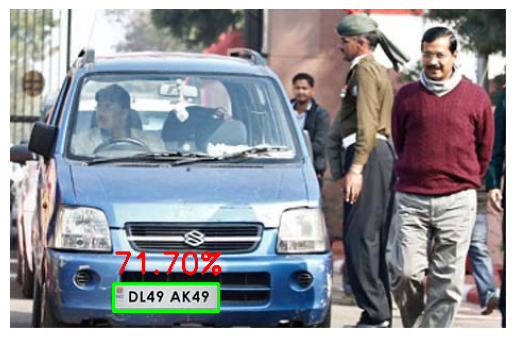

In [7]:
import matplotlib.pyplot as plt
import cv2

for result in results:
    for box in result.boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add confidence score text
        cv2.putText(
            image,
            f'{confidence * 100:.2f}%',  # format confidence as percentage
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 0, 0),  # blue text color
            2
        )

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()


In [8]:
#ocr object Character Recognasition it will convert images to text4
!pip install pytesseract

In [9]:
import pytesseract
from pytesseract import Output


image 1/1 /kaggle/input/car-plate-detection/images/Cars152.png: 224x320 1 license_plate, 10.7ms
Speed: 1.3ms preprocess, 10.7ms inference, 1.9ms postprocess per image at shape (1, 3, 224, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.7170], device='cuda:0')
data: tensor([[ 97.3159, 258.8785, 196.4919, 284.1910,   0.7170,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (300, 467)
shape: torch.Size([1, 6])
xywh: tensor([[146.9039, 271.5347,  99.1760,  25.3125]], device='cuda:0')
xywhn: tensor([[0.3146, 0.9051, 0.2124, 0.0844]], device='cuda:0')
xyxy: tensor([[ 97.3159, 258.8785, 196.4919, 284.1910]], device='cuda:0')
xyxyn: tensor([[0.2084, 0.8629, 0.4208, 0.9473]], device='cuda:0')
Detected License Plate Number: “ DL49 AK49



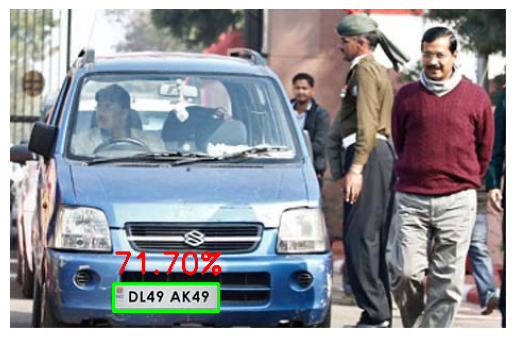

In [10]:
import cv2
import matplotlib.pyplot as plt
import pytesseract  # Make sure pytesseract is installed

# Load and prepare image
image = cv2.imread('/kaggle/input/car-plate-detection/images/Cars152.png')
results = model.predict('/kaggle/input/car-plate-detection/images/Cars152.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Loop through detection results
for result in results:
    for box in result.boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add confidence text
        cv2.putText(
            image,
            f'{confidence * 100:.2f}%',
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 0, 0),
            2
        )

        # Extract ROI and perform OCR
        roi = image[y1:y2, x1:x2]
        text = pytesseract.image_to_string(roi, config='--psm 6')
        print(f"Detected License Plate Number: {text}")

# Display the image with bounding box and confidence
plt.imshow(image)
plt.axis('off')
plt.show()





image 1/1 /kaggle/input/car-plate-detection/images/Cars197.png: 192x320 1 license_plate, 33.8ms
Speed: 1.0ms preprocess, 33.8ms inference, 1.9ms postprocess per image at shape (1, 3, 192, 320)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.6938], device='cuda:0')
data: tensor([[221.8143, 174.7348, 360.3799, 201.4145,   0.6938,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (350, 590)
shape: torch.Size([1, 6])
xywh: tensor([[291.0971, 188.0746, 138.5656,  26.6797]], device='cuda:0')
xywhn: tensor([[0.4934, 0.5374, 0.2349, 0.0762]], device='cuda:0')
xyxy: tensor([[221.8143, 174.7348, 360.3799, 201.4145]], device='cuda:0')
xyxyn: tensor([[0.3760, 0.4992, 0.6108, 0.5755]], device='cuda:0')
Detected License Plate Number: “LR



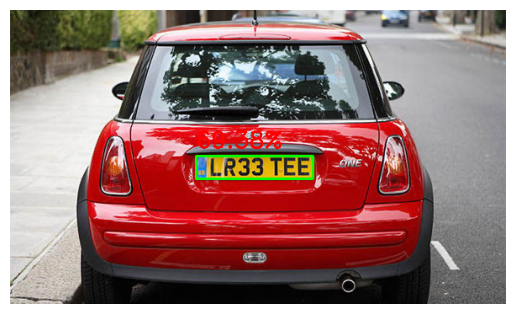

In [11]:
import cv2
import matplotlib.pyplot as plt
import pytesseract  # Make sure pytesseract is installed

# Load and prepare image
image = cv2.imread('/kaggle/input/car-plate-detection/images/Cars197.png')
results = model.predict('/kaggle/input/car-plate-detection/images/Cars197.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Loop through detection results
for result in results:
    for box in result.boxes:
        print(box)
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        confidence = box.conf[0]

        # Draw bounding box
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

        # Add confidence text
        cv2.putText(
            image,
            f'{confidence * 100:.2f}%',
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.9,
            (255, 0, 0),
            2
        )

        # Extract ROI and perform OCR
        roi = image[y1:y2, x1:x2]
        text = pytesseract.image_to_string(roi, config='--psm 6')
        print(f"Detected License Plate Number: {text}")

# Display the image with bounding box and confidence
plt.imshow(image)
plt.axis('off')
plt.show()

In [15]:
from ultralytics import YOLO

model = YOLO('/kaggle/input/model/pytorch/default/1/best_license_plate_model.pt')

# Run validation on the validation dataset (must be labeled properly in YOLO format)
metrics = model.val(data='/kaggle/working/datasets.yaml')  # make sure data.yaml is correct

print(metrics)


Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 18.1MB/s]

val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2933.4±596.7 MB/s, size: 538.7 KB)



val: Scanning /kaggle/working/datasets/cars_license_plate_new/val/labels... 87 images, 0 backgrounds, 0 corrupt: 100%|██████████| 87/87 [00:00<00:00, 567.23it/s]

val: New cache created: /kaggle/working/datasets/cars_license_plate_new/val/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         87         87      0.925       0.92      0.951      0.589
Speed: 0.6ms preprocess, 5.5ms inference, 0.0ms loss, 1.4ms postprocess per image
Results saved to runs/detect/val3
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7f7fb52ff4d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.03303

In [16]:
#stermlet you have th basic html

In [17]:
!pip install pandas matplotlib streamlit opencv-python ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 55.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 74.2 MB/s eta 0:00:00:00:0100:01


In [18]:
import pandas as pd
import streamlit  as st
import cv2
from ultralytics import YOLO

In [20]:
!pip install gradio


In [34]:
import gradio as gr
import cv2
import numpy as np
from PIL import Image
import pytesseract
from ultralytics import YOLO
import tempfile
import os

# Load YOLO model
model = YOLO('/kaggle/input/model/pytorch/default/1/best_license_plate_model.pt')

# OCR config
tess_config = '--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789'

# Image processing function
def process_image(input_image):
    image = np.array(input_image)
    results = model(image)
    plate_texts = []

    for box in results[0].boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        roi = image[y1:y2, x1:x2]
        if roi.size == 0:
            continue

        gray = cv2.cvtColor(roi, cv2.COLOR_RGB2GRAY)
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        text = pytesseract.image_to_string(thresh, config=tess_config).strip()
        if text:
            plate_texts.append(text)
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    output_image = Image.fromarray(image)
    return output_image, "\n".join(plate_texts) if plate_texts else "No license plates detected."

# Video processing function
def process_video(video_path):
    cap = cv2.VideoCapture(video_path)
    plate_texts = []
    frames = []

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        results = model(frame)

        for box in results[0].boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            roi = frame[y1:y2, x1:x2]
            if roi.size == 0:
                continue

            gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
            _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            text = pytesseract.image_to_string(thresh, config=tess_config).strip()
            if text:
                plate_texts.append(text)
                cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
                cv2.putText(frame, text, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        frames.append(frame)

    cap.release()

    # Save annotated video to temp file
    temp_video_path = tempfile.mktemp(suffix=".mp4")
    height, width = frames[0].shape[:2]
    out = cv2.VideoWriter(temp_video_path, cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

    for frame in frames:
        out.write(frame)
    out.release()

    return temp_video_path, "\n".join(set(plate_texts)) if plate_texts else "No license plates detected."

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## 🚗 License Plate Detection (YOLO + OCR)")
    with gr.Tab("Image"):
        with gr.Row():
            img_input = gr.Image(type="pil", label="Upload Image")
            img_output = gr.Image(type="pil", label="Detected Plates")
        img_text = gr.Textbox(label="License Plate Text(s)")
        img_btn = gr.Button("Detect from Image")

    with gr.Tab("Video"):
        with gr.Row():
            video_input = gr.Video(label="Upload Video")
            video_output = gr.Video(label="Detected Plates Video")
        video_text = gr.Textbox(label="License Plate Text(s)")
        vid_btn = gr.Button("Detect from Video")

    img_btn.click(fn=process_image, inputs=img_input, outputs=[img_output, img_text])
    vid_btn.click(fn=process_video, inputs=video_input, outputs=[video_output, video_text])

demo.launch()





* Running on local URL:  http://127.0.0.1:7867
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

* Running on public URL: https://91fbf0ebd17e7b2e84.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)



0: 320x320 4 license_plates, 13.2ms
Speed: 2.1ms preprocess, 13.2ms inference, 2.1ms postprocess per image at shape (1, 3, 320, 320)

0: 320x320 4 license_plates, 11.6ms
Speed: 1.4ms preprocess, 11.6ms inference, 2.4ms postprocess per image at shape (1, 3, 320, 320)

0: 192x320 1 license_plate, 32.0ms
Speed: 0.8ms preprocess, 32.0ms inference, 1.4ms postprocess per image at shape (1, 3, 192, 320)

0: 288x320 1 license_plate, 34.5ms
Speed: 1.1ms preprocess, 34.5ms inference, 1.6ms postprocess per image at shape (1, 3, 288, 320)

0: 224x320 1 license_plate, 38.0ms
Speed: 1.5ms preprocess, 38.0ms inference, 1.6ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 6.6ms
Speed: 1.1ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 6.7ms
Speed: 1.0ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 320)

0: 224x320 1 license_plate, 6.4ms
Speed: 1.0ms preprocess, 6.4ms infer

/usr/local/lib/python3.11/dist-packages/gradio/components/video.py:355: UserWarning: Video does not have browser-compatible container or codec. Converting to mp4.
  warnings.warn(



0: 320x320 1 license_plate, 9.1ms
Speed: 1.7ms preprocess, 9.1ms inference, 126.8ms postprocess per image at shape (1, 3, 320, 320)
